In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime 


ANOVA
On effectue une analyse de variance pour mesurer l'indépendance entre une varaible qualitative et une variable quantitative
Variable qualitative : mois ou semaine de transaction
Variable quantitative : tx_amount

In [2]:
df_A=pd.read_csv("/Users/corentinpla/Documents/C-2-Statap/transactions_A.csv")

In [17]:
def get_week_of_the_year(s):
    year=int(s[0:4])
    month=int(s[5:7])
    day=int(s[8:10])

    return(datetime.date(year, month, day).isocalendar().week)
    

def get_week(s):
    year=int(s[0:4])
    week=get_week_of_the_year(s)

    return((year-2018)*52+week)
    

def get_month_of_the_year(s):
    return(int(s[5:7]))
    

def get_month(s):
    month=get_month_of_the_year(s)
    year=int(s[0:4])
    
    return((year-2018)*12+month)

def get_year(s):
    year=s[:4]

    return(int(year))



In [19]:

df_A["week"]=df_A["timestamp"].apply(lambda x:get_week(x))
df_A["week_year"]=df_A["timestamp"].apply(lambda x:get_week_of_the_year(x))
df_A["month"]=df_A["timestamp"].apply(lambda x:get_month(x))
df_A["month_year"]=df_A["timestamp"].apply(lambda x:get_month_of_the_year(x))
df_A["year"]=df_A["timestamp"].apply(lambda x:get_year(x))


In [26]:
df_test=df_A.sample(n=1000)

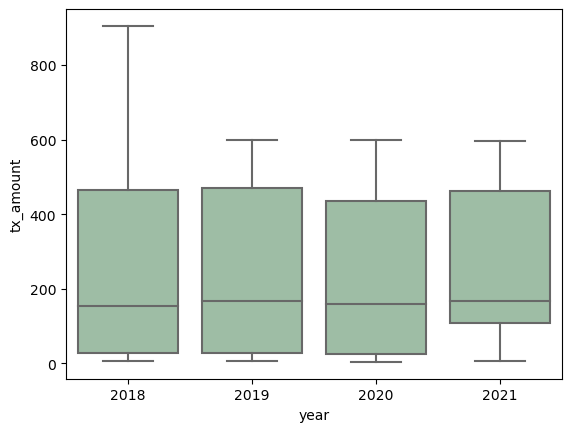

In [28]:
ax = sns.boxplot(x='year', y='tx_amount', data=df_test, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

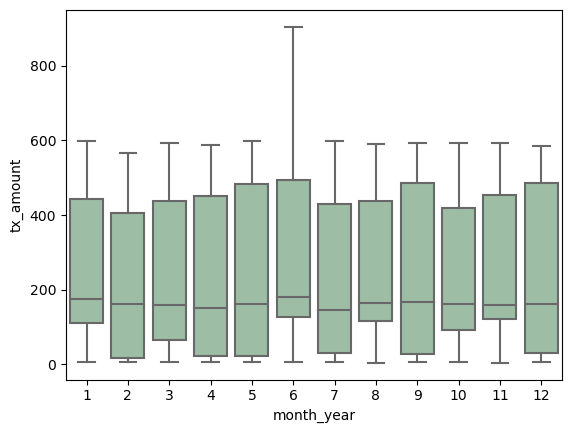

In [30]:
ax = sns.boxplot(x='month_year', y='tx_amount', data=df_test, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

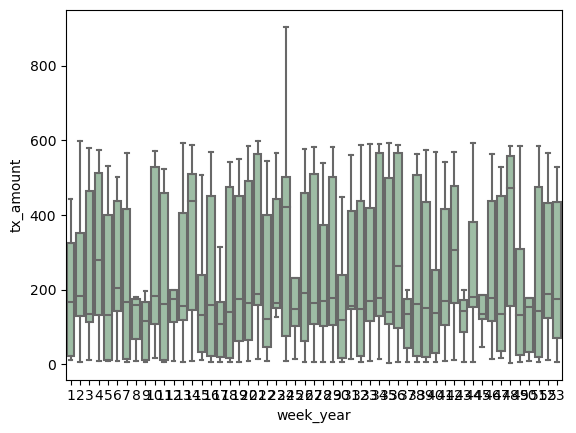

In [31]:
ax = sns.boxplot(x='week_year', y='tx_amount', data=df_test, color='#99c2a2',showfliers=False)
#ax = sns.swarmplot(x="year", y="tx_amount", data=df_test, color='#7d0013')
plt.show()

In [32]:
#year
model = ols('tx_amount ~ year',             
            data = df_test).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                sum_sq     df          F    PR(>F)
year      4.658927e+13    1.0  14.223348  0.000172
Residual  3.268998e+15  998.0        NaN       NaN


Interprétation 

In [33]:
#month
model = ols('tx_amount ~ month_year',             
            data = df_test).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                  sum_sq     df         F    PR(>F)
month_year  3.757673e+12    1.0  1.132352  0.287532
Residual    3.311829e+15  998.0       NaN       NaN


In [34]:
#week
model = ols('tx_amount ~ week_year',             
            data = df_test).fit()
                
anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)

                 sum_sq     df         F    PR(>F)
week_year  2.609324e+12    1.0  0.786032  0.375516
Residual   3.312978e+15  998.0       NaN       NaN
